# Data & Model Visualization

In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import csv
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Embedding, Activation, Dropout
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from keras import layers
from tensorflow.keras.layers import GlobalMaxPooling1D
from keras.layers import Bidirectional
from keras.callbacks import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import spatial
from gensim.utils import simple_preprocess
from keras.preprocessing import sequence
from keras.utils.vis_utils import plot_model
from keras.models import load_model
import tensorflow as tf
from keras.models import load_model
import json
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Load Dataset

In [3]:
file='../complete_training_all_punctuation_cleaning_stopword.csv'
data = pd.read_csv(file,header=0, delimiter="\t",encoding='utf-8')
data.text=data.text.astype(str)
data.head(100)

,id,text,sentiment
0,1221875106206638080,والله الأرقام سيكون مخيب للآمال الأهلي قدها بر...,Positive
1,1221884257490042887,الزعل بيغير ملامحك بيغير نظرة العين بيغير شكلك...,Neutral
2,1226422627436310528,الحب الحقيقي اقتسام شخص أخر أقرب احلام مستغانمي,Positive
3,1221880820815798277,النهضة فتيل,Positive
4,1221884400377499651,حباً ايران بقدر ماهو نكايه بترامب وحزبه,Neutral
...,...,...,...
95,1221882259139067911,ليه اسوم حياتي غيرت وانا اعرف,Neutral
96,1221881289881550848,هههه ضحكت حالة نفسية سعيده,Positive
97,1227326811652026368,الحمدلله حضنت امي الحقيقية تعرفون شنو شعور تتر...,Positive
98,1221882556548816896,توني ادري ان قناة اسمها يمدح السوق الا اللي رب...,Neutral


In [4]:
data.shape

(53289, 3)

In [5]:
labels = data[['id', 'sentiment']]
labels.sentiment.value_counts()

Neutral     36082
Negative     8674
Positive     8533
Name: sentiment, dtype: int64

In [6]:
classes = sorted(labels.sentiment.unique())
classes

['Negative', 'Neutral', 'Positive']

In [7]:
dfs = []
for sentiment in classes:
    df_temp = data.where(data.sentiment == sentiment)
    df_temp.dropna(axis=0, inplace=True)
    dfs.append(df_temp)
ls = [len(df) for df in dfs]
ls

[8674, 36082, 8533]

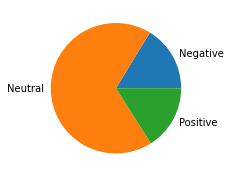

In [8]:
plt.figure(figsize=(3, 3))
plt.pie(ls, labels=classes);

# Augmented dataframe

In [9]:
# new_dfs = [pd.concat([df]*int(max(ls)/len(df)), ignore_index=True) 
#            for df in dfs]

In [10]:
# new_ls = [len(df) for df in new_dfs]
# new_ls

In [11]:
# plt.figure(figsize=(3, 3))
# plt.pie(new_ls, labels=classes);

In [12]:
# data = pd.concat(new_dfs, ignore_index=True)
# labels = data[['id','text', 'sentiment']]
# classes = sorted(labels.sentiment.unique())
# classes

In [13]:
data["sentiment"].value_counts()
cleanup_nums = {"sentiment":     {"Neutral": 0,"Negative":2, "Positive": 1,}}
data = data.replace(cleanup_nums)
data.head(100)

,id,text,sentiment
0,1221875106206638080,والله الأرقام سيكون مخيب للآمال الأهلي قدها بر...,1
1,1221884257490042887,الزعل بيغير ملامحك بيغير نظرة العين بيغير شكلك...,0
2,1226422627436310528,الحب الحقيقي اقتسام شخص أخر أقرب احلام مستغانمي,1
3,1221880820815798277,النهضة فتيل,1
4,1221884400377499651,حباً ايران بقدر ماهو نكايه بترامب وحزبه,0
...,...,...,...
95,1221882259139067911,ليه اسوم حياتي غيرت وانا اعرف,0
96,1221881289881550848,هههه ضحكت حالة نفسية سعيده,1
97,1227326811652026368,الحمدلله حضنت امي الحقيقية تعرفون شنو شعور تتر...,1
98,1221882556548816896,توني ادري ان قناة اسمها يمدح السوق الا اللي رب...,0


# Data visualization

In [14]:
data.head(100)

,id,text,sentiment
0,1221875106206638080,والله الأرقام سيكون مخيب للآمال الأهلي قدها بر...,1
1,1221884257490042887,الزعل بيغير ملامحك بيغير نظرة العين بيغير شكلك...,0
2,1226422627436310528,الحب الحقيقي اقتسام شخص أخر أقرب احلام مستغانمي,1
3,1221880820815798277,النهضة فتيل,1
4,1221884400377499651,حباً ايران بقدر ماهو نكايه بترامب وحزبه,0
...,...,...,...
95,1221882259139067911,ليه اسوم حياتي غيرت وانا اعرف,0
96,1221881289881550848,هههه ضحكت حالة نفسية سعيده,1
97,1227326811652026368,الحمدلله حضنت امي الحقيقية تعرفون شنو شعور تتر...,1
98,1221882556548816896,توني ادري ان قناة اسمها يمدح السوق الا اللي رب...,0


In [15]:
data.shape

(53289, 3)

In [16]:
numWords = []

check = 0
with open(file, encoding='utf-8', mode='r') as reviewFile:
    reviewReader = csv.reader(reviewFile, dialect='excel', delimiter='\t')
    for row in reviewReader:
        counter = len(simple_preprocess(row[1]))
        numWords.append(counter)
        check = check + 1
        if(check % 53289 == 0):
            print('check ', check)
            break
    reviewFile.close()
        
numFiles = len(numWords)
print('Resume : ')
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))
jumlahKataMaksimal = max(numWords)
print('Maximum words length: ', jumlahKataMaksimal)

check  53289
Resume : 
The total number of files is 53289
The total number of words in the files is 524334
The average number of words in the files is 9.839441535776615
Maximum words length:  26


In [17]:
data['word_count'] = data.text.str.split().str.len()

<Figure size 720x360 with 0 Axes>

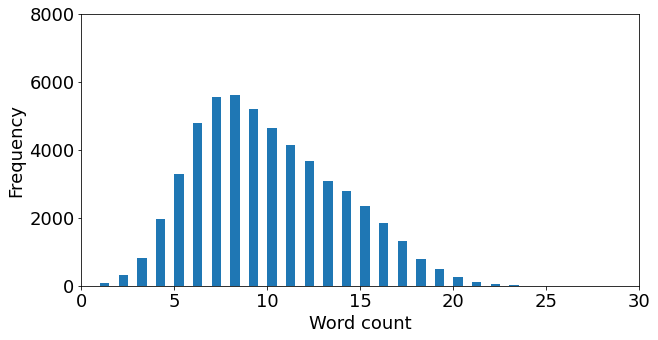

In [21]:
%matplotlib inline
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.figure(figsize=(10,5))
plt.hist(data['word_count'], 50)
plt.xlabel('Word count')
plt.ylabel('Frequency')
plt.axis([0, 30, 0, 8000])
plt.show()

# Convert to Numerical

In [195]:
maxSeqLength = 30

#conversion to list and then displaying the list
text = data['text'].tolist()

#tokenizer to read all the words present in our dtaset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

#declaring the vocab_size
size_of_vocabulary  = len(tokenizer.word_index) + 1

#conversion to numerical formats
encoded_text = tokenizer.texts_to_sequences(text)
max_length = maxSeqLength
X = sequence.pad_sequences(encoded_text, maxlen=max_length, padding='post')
y = data['sentiment']

In [196]:
print(X.shape)
print(y.shape)

(53289, 30)
(53289,)


# Split Dataset

In [197]:
# ROS
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2,stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(86596, 30) (86596,)
(21650, 30) (21650,)


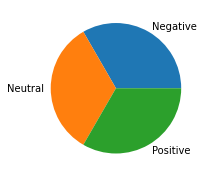

In [198]:
plt.figure(figsize=(3, 3))
plt.pie(y.value_counts(), labels=classes);
# y.value_counts()

In [199]:
y.value_counts()

2    36082
1    36082
0    36082
Name: sentiment, dtype: int64

# LSTM Glove 1 Layer

In [200]:
model_g1 = load_model('themodel_g1.h5')
model_g1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 300)           31476300  
_________________________________________________________________
lstm (LSTM)                  (None, 30, 64)            93440     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 31,574,095
Trainable params: 97,795
Non-trainable params: 31,476,300
_________________________________________________________________


In [201]:
# Training Accuracy
_, train_acc = model_g1.evaluate(X_train, y_train, verbose=0)
print('Train: %.4f' % (train_acc))

Train: 0.9047


In [202]:
hist_g1 = json.load(open('history_g1.json'))
print(hist_g1.keys())

loss_g1 = hist_g1['loss']
val_loss_g1 = hist_g1['val_loss']
acc_g1 = hist_g1['acc']
val_acc_g1 = hist_g1['val_acc']

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


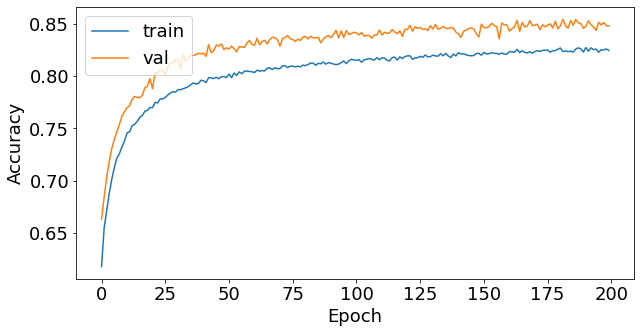

<Figure size 432x288 with 0 Axes>

In [255]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(hist_g1['acc'])
plt.plot(hist_g1['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()
fig.savefig('Glove-1 Acc.png', dpi=300)

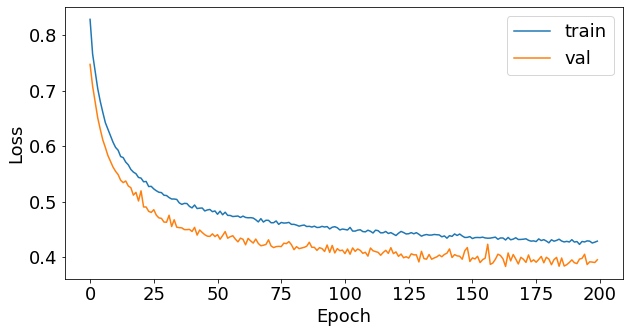

<Figure size 432x288 with 0 Axes>

In [256]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(loss_g1, label='train')
plt.plot(val_loss_g1, label='val')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('Glove-1 Loss.png', dpi=300)

In [205]:
# Validation Accuracy
print("Validation Accuracy: %.4f" % max(val_acc_g1))

Validation Accuracy: 0.8543


In [206]:
# Testing Accuracy
%time
y_pred = model_g1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [207]:
cm = tf.math.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print("------")
print('Classification Report')
target_names = ['neutral','positive', 'negative']
print(classification_report(y_test, y_pred, target_names=target_names ))

Confusion Matrix
tf.Tensor(
[[4703 1238 1275]
 [ 260 6804  153]
 [ 322  175 6720]], shape=(3, 3), dtype=int32)
------
Classification Report
              precision    recall  f1-score   support

     neutral       0.89      0.65      0.75      7216
    positive       0.83      0.94      0.88      7217
    negative       0.82      0.93      0.87      7217

    accuracy                           0.84     21650
   macro avg       0.85      0.84      0.84     21650
weighted avg       0.85      0.84      0.84     21650



In [208]:
%time
print("Testing Accuracy: %.4f" % accuracy_score(y_test, y_pred))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
Testing Accuracy: 0.8419


# LSTM Glove 2 Layers

In [209]:
model_g2 = load_model('themodel_g2.h5')
model_g2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 30, 300)           31476300  
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 64)            93440     
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 31,607,119
Trainable params: 130,819
Non-trainable params: 31,476,300
____________________________________

In [210]:
# Training Accuracy
_, train_acc = model_g2.evaluate(X_train, y_train, verbose=0)
print('Train: %.4f' % (train_acc))

Train: 0.9436


In [211]:
hist_g2 = json.load(open('history_g2.json'))
loss_g2 = hist_g2['loss']
val_loss_g2 = hist_g2['val_loss']
acc_g2 = hist_g2['acc']
val_acc_g2 = hist_g2['val_acc']

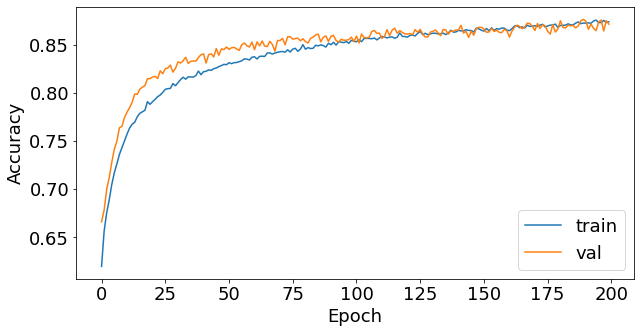

<Figure size 432x288 with 0 Axes>

In [257]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(acc_g2, label='train')
plt.plot(val_acc_g2, label='val')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('Glove-2 Acc.png', dpi=300)

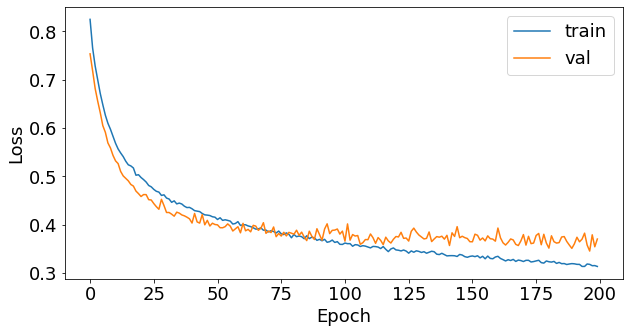

<Figure size 432x288 with 0 Axes>

In [258]:
fig = plt.figure(figsize=(10,5))

plt.rcParams["font.size"] = "18"
plt.plot(loss_g2, label='train')
plt.plot(val_loss_g2, label='val')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('Glove-2 Loss.png', dpi=300)

In [214]:
# Validation Accuracy
print("Validation Accuracy: %.4f" % max(val_acc_g2))

Validation Accuracy: 0.8764


In [215]:
# Testing Accuracy
%time
y_pred = model_g2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.2 µs


In [216]:
cm = tf.math.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print("------")
print('Classification Report')
target_names = ['neutral','positive', 'negative']
print(classification_report(y_test, y_pred, target_names=target_names ))

Confusion Matrix
tf.Tensor(
[[4998 1017 1201]
 [ 221 6866  130]
 [ 231  103 6883]], shape=(3, 3), dtype=int32)
------
Classification Report
              precision    recall  f1-score   support

     neutral       0.92      0.69      0.79      7216
    positive       0.86      0.95      0.90      7217
    negative       0.84      0.95      0.89      7217

    accuracy                           0.87     21650
   macro avg       0.87      0.87      0.86     21650
weighted avg       0.87      0.87      0.86     21650



In [217]:
%time
print("Testing Accuracy: %.4f" % accuracy_score(y_test, y_pred))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
Testing Accuracy: 0.8659


# LSTM Glove 3 Layers

In [218]:
model_g3 = load_model('themodel_g3.h5')
model_g3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 30, 300)           31476300  
_________________________________________________________________
lstm_8 (LSTM)                (None, 30, 64)            93440     
_________________________________________________________________
lstm_9 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 64)            33024     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [219]:
# Training Accuracy
_, train_acc = model_g3.evaluate(X_train, y_train, verbose=0)
print('Train: %.4f' % (train_acc))

Train: 0.9556


In [220]:
hist_g3 = json.load(open('history_g3.json'))
loss_g3 = hist_g3['loss']
val_loss_g3 = hist_g3['val_loss']
acc_g3 = hist_g3['acc']
val_acc_g3 = hist_g3['val_acc']

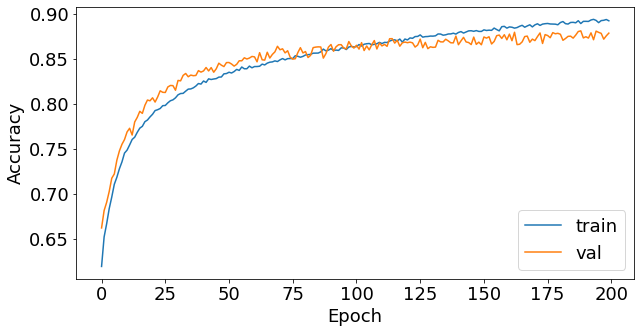

<Figure size 432x288 with 0 Axes>

In [259]:
fig = plt.figure(figsize=(10,5))

plt.rcParams["font.size"] = "18"
plt.plot(acc_g3, label='train')
plt.plot(val_acc_g3, label='val')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('Glove-3 Acc.png', dpi=300)

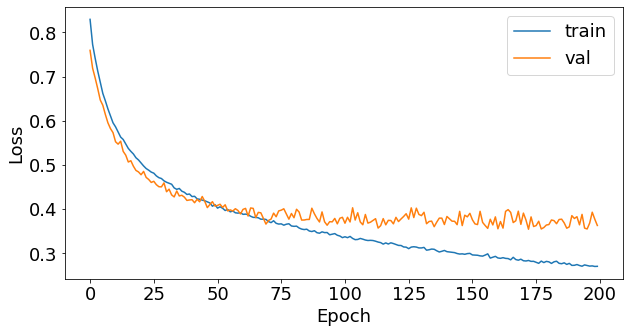

<Figure size 432x288 with 0 Axes>

In [260]:
fig = plt.figure(figsize=(10,5))

plt.rcParams["font.size"] = "18"
plt.plot(loss_g3, label='train')
plt.plot(val_loss_g3, label='val')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('Glove-3 Loss.png', dpi=300)

In [223]:
# Validation Accuracy
print("Validation Accuracy: %.4f" % max(val_acc_g3))

Validation Accuracy: 0.8812


In [224]:
# Testing Accuracy
%time
y_pred = model_g3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [225]:
cm = tf.math.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print("------")
print('Classification Report')
target_names = ['neutral','positive', 'negative']
print(classification_report(y_test, y_pred, target_names=target_names ))

Confusion Matrix
tf.Tensor(
[[5168 1167  881]
 [ 194 6975   48]
 [ 268  167 6782]], shape=(3, 3), dtype=int32)
------
Classification Report
              precision    recall  f1-score   support

     neutral       0.92      0.72      0.80      7216
    positive       0.84      0.97      0.90      7217
    negative       0.88      0.94      0.91      7217

    accuracy                           0.87     21650
   macro avg       0.88      0.87      0.87     21650
weighted avg       0.88      0.87      0.87     21650



In [226]:
%time
print("Testing Accuracy: %.4f" % accuracy_score(y_test, y_pred))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
Testing Accuracy: 0.8741


# LSTM FastText 1 Layer

In [227]:
model_f1 = load_model('themodel_f1.h5')
model_f1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           31476300  
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 64)            93440     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 31,574,095
Trainable params: 97,795
Non-trainable params: 31,476,300
_________________________________________________________________


In [228]:
# Training Accuracy
_, train_acc = model_f1.evaluate(X_train, y_train, verbose=0)
print('Train: %.4f' % (train_acc))

Train: 0.9284


In [229]:
hist_f1 = json.load(open('history_f1.json'))
loss_f1 = hist_f1['loss']
val_loss_f1 = hist_f1['val_loss']
acc_f1 = hist_f1['acc']
val_acc_f1 = hist_f1['val_acc']

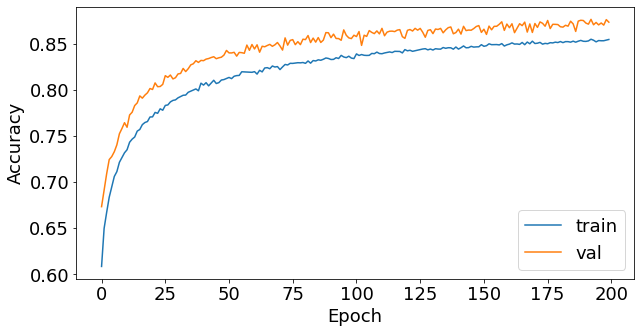

<Figure size 432x288 with 0 Axes>

In [261]:
fig = plt.figure(figsize=(10,5))

plt.rcParams["font.size"] = "18"
plt.plot(acc_f1, label='train')
plt.plot(val_acc_f1, label='val')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('FastText-1 Acc.png', dpi=300)

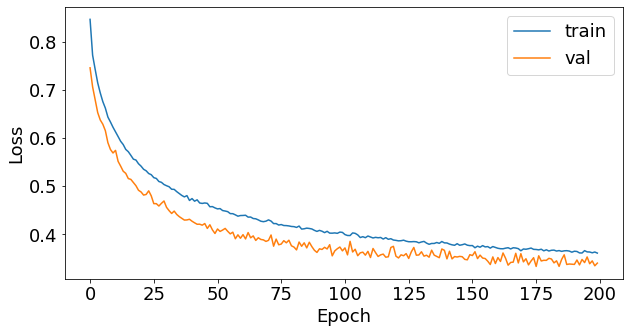

<Figure size 432x288 with 0 Axes>

In [262]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(loss_f1, label='train')
plt.plot(val_loss_f1, label='val')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('FastText-1 Loss.png', dpi=300)

In [232]:
# Validation Accuracy
print("Validation Accuracy: %.4f" % max(val_acc_f1))

Validation Accuracy: 0.8766


In [233]:
%time
# Testing Accuracy
y_pred = model_f1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.54 µs


In [234]:
cm = tf.math.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print("------")
print('Classification Report')
target_names = ['neutral','positive', 'negative']
print(classification_report(y_test, y_pred, target_names=target_names ))

Confusion Matrix
tf.Tensor(
[[5079  938 1199]
 [ 291 6828   98]
 [ 189   90 6938]], shape=(3, 3), dtype=int32)
------
Classification Report
              precision    recall  f1-score   support

     neutral       0.91      0.70      0.80      7216
    positive       0.87      0.95      0.91      7217
    negative       0.84      0.96      0.90      7217

    accuracy                           0.87     21650
   macro avg       0.88      0.87      0.87     21650
weighted avg       0.88      0.87      0.87     21650



In [235]:
%time
print("Testing Accuracy: %.4f" % accuracy_score(y_test, y_pred))

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 12.2 µs
Testing Accuracy: 0.8704


# LSTM FastText 2 Layers

In [236]:
model_f2 = load_model('themodel_f2.h5')
model_f2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           31476300  
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 64)            93440     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 31,607,119
Trainable params: 130,819
Non-trainable params: 31,476,300
____________________________________

In [237]:
# Training Accuracy
_, train_acc = model_f2.evaluate(X_train, y_train, verbose=0)
print('Train: %.4f' % (train_acc))

Train: 0.9542


In [238]:
hist_f2 = json.load(open('history_f2.json'))
loss_f2 = hist_f2['loss']
val_loss_f2 = hist_f2['val_loss']
acc_f2 = hist_f2['acc']
val_acc_f2 = hist_f2['val_acc']

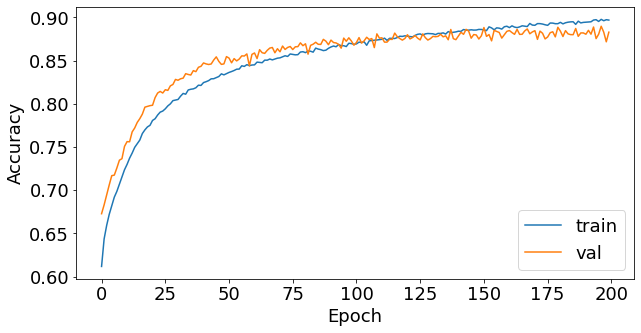

<Figure size 432x288 with 0 Axes>

In [263]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(acc_f2, label='train')
plt.plot(val_acc_f2, label='val')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('FastText-2 Acc.png', dpi=300)

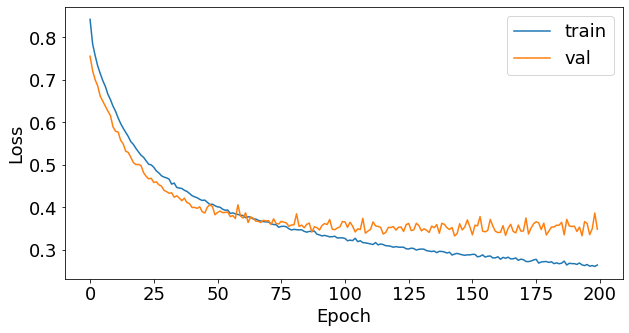

<Figure size 432x288 with 0 Axes>

In [264]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(loss_f2, label='train')
plt.plot(val_loss_f2, label='val')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('FastText-2 Loss.png', dpi=300)

In [241]:
# Validation Accuracy
print("Validation Accuracy: %.4f" % max(val_acc_f2))

Validation Accuracy: 0.8898


In [242]:
%time
# Testing Accuracy
y_pred = model_f2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.7 µs


In [243]:
cm = tf.math.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print("------")
print('Classification Report')
target_names = ['neutral','positive', 'negative']
print(classification_report(y_test, y_pred, target_names=target_names ))

Confusion Matrix
tf.Tensor(
[[5282  794 1140]
 [ 227 6880  110]
 [ 161   56 7000]], shape=(3, 3), dtype=int32)
------
Classification Report
              precision    recall  f1-score   support

     neutral       0.93      0.73      0.82      7216
    positive       0.89      0.95      0.92      7217
    negative       0.85      0.97      0.91      7217

    accuracy                           0.89     21650
   macro avg       0.89      0.89      0.88     21650
weighted avg       0.89      0.89      0.88     21650



In [244]:
%time
print("Testing Accuracy: %.4f" % accuracy_score(y_test, y_pred))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs
Testing Accuracy: 0.8851


# LSTM FastText 3 Layers

In [245]:
model_f3 = load_model('themodel_f3.h5')
model_f3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 300)           31476300  
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 64)            93440     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [246]:
# Training Accuracy
_, train_acc = model_f3.evaluate(X_train, y_train, verbose=0)
print('Train: %.4f' % (train_acc))

Train: 0.9678


In [247]:
hist_f3 = json.load(open('history_f3.json'))
loss_f3 = hist_f3['loss']
val_loss_f3 = hist_f3['val_loss']
acc_f3 = hist_f3['acc']
val_acc_f3 = hist_f3['val_acc']

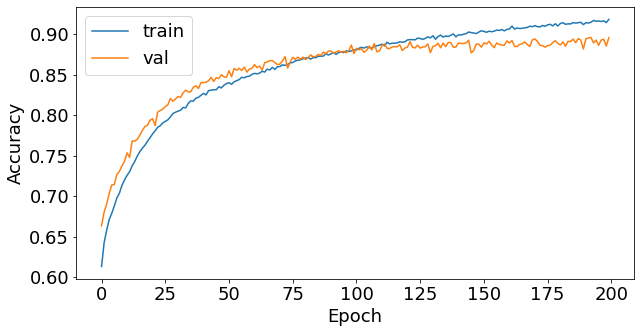

<Figure size 432x288 with 0 Axes>

In [265]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(acc_f3, label='train')
plt.plot(val_acc_f3, label='val')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('FastText-3 Acc.png', dpi=300)

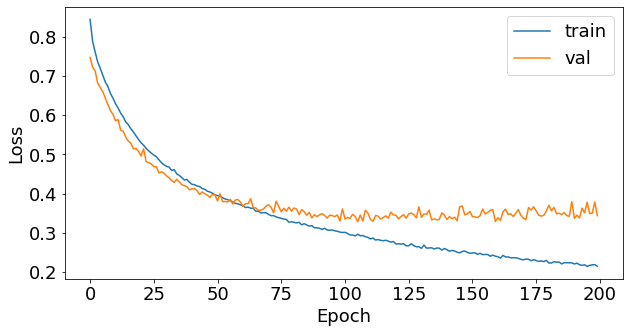

<Figure size 432x288 with 0 Axes>

In [266]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(loss_f3, label='train')
plt.plot(val_loss_f3, label='val')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('FastText-3 Loss.png', dpi=300)

In [250]:
# Validation Accuracy
print("Validation Accuracy: %.4f" % max(val_acc_f3))

Validation Accuracy: 0.8960


In [251]:
%time
# Testing Accuracy
y_pred = model_f3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [252]:
cm = tf.math.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print("------")
print('Classification Report')
target_names = ['neutral','positive', 'negative']
print(classification_report(y_test, y_pred, target_names=target_names ))

Confusion Matrix
tf.Tensor(
[[5484  810  922]
 [ 237 6902   78]
 [ 198   64 6955]], shape=(3, 3), dtype=int32)
------
Classification Report
              precision    recall  f1-score   support

     neutral       0.93      0.76      0.84      7216
    positive       0.89      0.96      0.92      7217
    negative       0.87      0.96      0.92      7217

    accuracy                           0.89     21650
   macro avg       0.90      0.89      0.89     21650
weighted avg       0.90      0.89      0.89     21650



In [253]:
%time
print("Testing Accuracy: %.4f" % accuracy_score(y_test, y_pred))

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.78 µs
Testing Accuracy: 0.8933
